# Google Case Study : How does a bike-share navigate speedy success?

### Para responder as perguntas de negócios seguiremos os passos de um procedimento de análise de dados:
### <span style="color:blue">**Ask**</span>
### <span style="color:green">**Prepare**</span>
### <span style="color:yellow">**Process**</span>
### <span style="color:orange">**Analyze**</span>
### <span style="color:purple">**Share**</span>
### <span style="color:red">**Act**</span>
---

## <span style="color:blue">**ASK – Definição do Problema e Objetivos**</span>
## 1. Qual é o problema que estamos tentando resolver?

A empresa **Cyclistic** deseja **aumentar o número de assinaturas anuais** do seu serviço de compartilhamento de bicicletas. Embora a flexibilidade de planos (passe único, passe diário e assinatura anual) ajude a atrair diversos tipos de usuários, **os membros anuais geram maior lucratividade** para o negócio.

Atualmente, uma parcela significativa dos usuários são **"casual riders"** – ou seja, pessoas que utilizam o serviço com passes diários ou únicos. O time de marketing da Cyclistic acredita que **há uma oportunidade real de converter esses usuários casuais em assinantes anuais**.

Portanto, é necessário **entender como os comportamentos de uso diferem entre usuários casuais e membros anuais**, a fim de embasar estratégias de marketing mais direcionadas e eficazes.

---

## 2. Qual é a tarefa de negócio (Business Task)?

A tarefa de negócio atribuída a este projeto é:

- **Analisar os dados históricos de viagens da Cyclistic para entender como membros anuais e usuários casuais utilizam o sistema de bicicletas de forma diferente.**  
- A partir dessa análise, gerar insights acionáveis que possam servir de base para estratégias de marketing voltadas à conversão de **usuários casuais** em **membros anuais**.

---

## 3. Quem são os stakeholders?

- **Lily Moreno** – Diretora de marketing da Cyclistic, responsável pelo planejamento das campanhas. É quem lidera a iniciativa de conversão dos usuários casuais.
- **Equipe de Análise de Marketing da Cyclistic** – Responsável por coletar, tratar e analisar os dados que subsidiarão as decisões estratégicas.
- **Equipe Executiva da Cyclistic** – Tomadores de decisão finais que irão avaliar os dados e aprovar (ou não) as recomendações de marketing.
- **Usuários finais (casuais e membros)** – O público-alvo da campanha futura. Seus padrões de comportamento serão analisados para guiar as ações.

---

## 4. Moreno, diretora de marketing da empresa, nos deu a responsabilidade de responder as perguntas:  
### - Como os Membros Anuais e os Casuais se diferenciam?  
### - Por que um usuário Casual compraria o plano Anual (annual membership)?  
### - Como que a empresa pode influenciar os usuários Casuais a se tornarem Membros através das Mídias Digitais?  

É preciso produzir um relatório com os itens a seguir:
1. Uma declaração clara da tarefa de negócios
2. Uma descrição de todas as fontes de dados utilizadas
3. Documentação de qualquer limpeza ou manipulação dos dados
4. Um resumo da sua análise
5. Visualizações de apoio e principais descobertas
6. Suas três principais recomendações com base na análise

---

## <span style="color:green">**PREPARE – Um primeiro olhar nos Dados**</span>

Para a análise do problema, utilizaremos o arquivo 202404-divvy-tripdata.csv

Os dados estão em formato CSV.
Eu abri o arquivo CSV no Excel para ter uma primeira análise do que vamos abordar.

O CSV possui:
- ID da Corrida  
- Tipo de bicicleta  
- Data de início e término da corrida com o Horário  
- ID da estacão  de saída e de chegada
- Nome da estacão de saída e de chegada
- Latidude de início e término  
- Longitude de início e término  
- Tipo de Membro (casual ou anual)  

---

## <span style="color:yellow">**PROCESS - Ferramentas e Limpeza**</span>

Ferramentas utilizadas na análise:
- Jupyter Notebook (Linguagem R)
- Excel
- PostgreSQL (DBeaver)

---

### Preparacão e Limpeza

1) Primeiro, abrimos os arquivos CSV no Excel e, na aba Página Inicial, selecionamos a ferramenta de 'Localizar e Selecionar' e, em seguida, selecionamos a ferramenta 'substituir'.  
Como parâmetro, colocamos aspas duplas (") e deixamos o campo 'substituir por' = vazio.  
**Objetivo**: Retirar as aspas duplas (") para evitar problemas no momento de importar no DBeaver (PostgreSQL).
OBS: Esse processo foi feito nos 12 arquivos CSV, cada arquivo representando um mês, de abril de 2024 até marco de 2025.  

2) Para importar esses arquivos, nas configuracões de importacão do DBeaver, aumentamos o 'Tamanho mínimo de Coluna' de 50 para 150 e o tipo de varchar[50] para varchar[150].  
**Objetivo**: Evitar erros de limite de caracteres.  
  
3) Após importar todos os dados em tabelas no DBeaver, realizamos um UNION para unir todas as 12 tabelas (Ponto 1 no código SQL CleanData).  
CREATE TABLE all_rides as
SELECT * FROM "202404_divvy_tripdata"  
UNION ALL  
SELECT * FROM "202405_divvy_tripdata"  
UNION ALL  
.  
..  
...  
  
4) Em seguida, foi feita uma verificacão/limpeza de linhas vazias ou nulas (Ponto 2 no código SQL CleanData).  
  
5) Eliminacão de linhas com colunas ended_at < started_at, preparando os dados para criar uma coluna chamada ride_length (Ponto 3 no código SQL CleanData).  
  
6) Criacão da coluna ride_length que mostra a duracão total das corridas realizadas (Ponto 4 no código SQL CleanData).  
  
7) Verificacão nos tempos das corridas. Corridas menores que 1 min foram retiradas, pois representam possiveis inconsistências (corridas canceladas, testes, erros) (Ponto 5 no código SQL CleanData).  
  
8) Criacão de uma coluna chamada day_of_week para analisar as preferências dos dias da semana pelos usuários (Ponto 6 no código SQL CleanData).  

--- 

Para a exclusão das corridas que comecaram e terminaram nas mesmas coordenadas, partimos desse pressuposto:  

**Caso**--------------------------------------------------**É inconsistente?**  
Mesmo local, tempo alto (ex: 15 min)---------------Não — usuário pode ter só dado uma volta  
Mesmo local, tempo baixo (ex: 1min ou menos)------------------Provavelmente sim — pode ser erro ou teste  
Local diferente, tempo baixo------------------------Depende — mas se < 120s, pode ser suspeito  
Local diferente, tempo ok---------------------------Normal  
  
OBS: Existem algumas corridas com duracao maior que 4h que, possivelmente, são inconsistências pondendo ser um dos pontos a seguir:
- O usuário esqueceu de encerrar a corrida;  
- A estação teve problemas técnicos;  
- O dado de ended_at, talvez, tenha sido registrado incorretamente;   
  
Para a maioria dos dados de bike sharing (como os do CicloTrip, Divvy, Bike Rio, etc), os passeios costumam durar entre:  
- 5 a 60 minutos (para usuários comuns)  
- Até 2 horas (em alguns casos)  
- Muito raramente mais de 4 horas  

Contudo, optamos por manter os dados com ride_length até 4 horas de duracão e **filtrá-los** em algumas consultas.  
- **Para vias de observacão, temos 4.066.644 corridas de até 4h de duracão (números mais realistas) e apenas 6.954 com 4h ou mais (cerca de 0,17%).**  
- **Como é menos de 1% do total, filtrar esses dados acima de 4h tende a ser seguro e pouco impactante.**  
*Esses casos foram considerados outliers que poderiam impactar negativamente na análise estatística, especialmente nas médias e distribuições, sem comprometer a representatividade dos dados.*

## <span style="color:orange">**ANALYZE - Estudando os Dados.**</span>

Foram criadas Média, Máximo e Moda de algumas colunas para uma melhor análise......................


In [1]:
# Instalando pacotes necessários:
install.packages("DBI")
install.packages("RPostgres")

Instalando pacote em 'C:/Users/JoTa/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'DBI' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\JoTa\AppData\Local\Temp\RtmpwJ3GpA\downloaded_packages


Instalando pacote em 'C:/Users/JoTa/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'RPostgres' desempacotado com sucesso e somas MD5 verificadas


Warning message:
"não foi possível remover a instalação prévia do pacote 'RPostgres'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\JoTa\AppData\Local\R\win-library\4.4\00LOCK\RPostgres\libs\x64\RPostgres.dll to C:\Users\JoTa\AppData\Local\R\win-library\4.4\RPostgres\libs\x64\RPostgres.dll: Permission denied"
Warning message:
"'RPostgres' restaurado"



Os pacotes binários baixados estão em
	C:\Users\JoTa\AppData\Local\Temp\RtmpwJ3GpA\downloaded_packages


In [2]:
library(DBI)
library(RPostgres)


Warning message:
"pacote 'DBI' foi compilado no R versão 4.4.3"
Warning message:
"pacote 'RPostgres' foi compilado no R versão 4.4.3"


In [3]:
# Puxando variáveis do .Renviron
# É aqui que você deve colocar as variáveis de ambiente para conexão com o banco de dados.
host <- Sys.getenv("PG_HOST")
port <- Sys.getenv("PG_PORT")
user <- Sys.getenv("PG_USER")
password <- Sys.getenv("PG_PASSWORD")
dbname <- Sys.getenv("PG_DB")

In [4]:
# Conectando
con <- dbConnect(
  RPostgres::Postgres(),
  dbname = dbname,
  host = host,
  port = port,
  user = user,
  password = password
)

---
# Após realizar a conexao

In [5]:
df <- dbGetQuery(con, "SELECT * FROM all_rides")
# Demora por volta de 50seg
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,322ED1A33EAD23C4,electric_bike,2024-06-23 10:49:43,2024-06-23 11:02:27,Wells St & Elm St,KA1504000135,Southport Ave & Clybourn Ave,TA1309000030,41.90326,-87.63486,41.92077,-87.66371,member,00:12:43.84,Sunday
2,CB358067A835C900,classic_bike,2024-06-12 16:20:44,2024-06-12 16:28:03,Dearborn St & Monroe St,TA1305000006,State St & Kinzie St,13050,41.88132,-87.62952,41.88937,-87.62708,member,00:07:19.356,Wednesday
3,9DEB17F6A13B2160,electric_bike,2024-06-20 17:56:00,2024-06-20 18:17:07,Wells St & Elm St,KA1504000135,Racine Ave & Washington Blvd,654,41.90311,-87.63462,41.88307,-87.65695,casual,00:21:06.986,Thursday
4,8299693EA273A24F,classic_bike,2024-06-08 07:42:34,2024-06-08 08:02:21,Lakefront Trail & Bryn Mawr Ave,15576,Clarendon Ave & Gordon Ter,13379,41.98404,-87.65228,41.95787,-87.64951,casual,00:19:46.614,Saturday
5,4B8EB5D51DBC50EF,classic_bike,2024-06-13 15:36:43,2024-06-13 16:00:16,Dearborn St & Monroe St,TA1305000006,Southport Ave & Clybourn Ave,TA1309000030,41.88132,-87.62952,41.92077,-87.66371,member,00:23:32.386,Thursday
6,20D82B8956DCA88B,electric_bike,2024-06-13 14:40:02,2024-06-13 15:08:33,Orleans St & Merchandise Mart Plaza,TA1305000022,State St & Kinzie St,13050,41.88781,-87.63697,41.88937,-87.62708,casual,00:28:31.031,Thursday


In [6]:
# Analisando o dataframe
str(df)

'data.frame':	4066644 obs. of  15 variables:
 $ ride_id           : chr  "322ED1A33EAD23C4" "CB358067A835C900" "9DEB17F6A13B2160" "8299693EA273A24F" ...
 $ rideable_type     : chr  "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct, format: "2024-06-23 10:49:43" "2024-06-12 16:20:44" ...
 $ ended_at          : POSIXct, format: "2024-06-23 11:02:27" "2024-06-12 16:28:03" ...
 $ start_station_name: chr  "Wells St & Elm St" "Dearborn St & Monroe St" "Wells St & Elm St" "Lakefront Trail & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "KA1504000135" "TA1305000006" "KA1504000135" "15576" ...
 $ end_station_name  : chr  "Southport Ave & Clybourn Ave" "State St & Kinzie St" "Racine Ave & Washington Blvd" "Clarendon Ave & Gordon Ter" ...
 $ end_station_id    : chr  "TA1309000030" "13050" "654" "13379" ...
 $ start_lat         : num  41.9 41.9 41.9 42 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 $ end_lat           : num  

---
# Analisando a Duracão Média para cada tipo de usuário:

In [7]:
media_duracao_total <- dbGetQuery (con, "select avg(ride_length) from all_rides ar where ride_length <= interval '04:00:00';")

# Media de duracao das corridas para todos os usuários
media_duracao_total

avg
<chr>
00:15:40.646802


In [8]:
media_duracao_membros <- dbGetQuery (con, "select avg(ride_length) from all_rides ar where member_casual = 'member' and ride_length <= interval '04:00:00'")

# Media de duracao das corridas para Membros
media_duracao_membros

avg
<chr>
00:12:05.594915


In [9]:
media_duracao_casuais <- dbGetQuery (con, "Select avg(ride_length) from all_rides ar where member_casual = 'casual' and ride_length <= interval '04:00:00'")

# Media de duracao das corridas para Casuais
media_duracao_casuais

avg
<chr>
00:21:54.85804


---
# Analisando a Moda dos dias da semana para cada tipo de usuário:

In [10]:
moda_total <- dbGetQuery (con, "SELECT day_of_week, COUNT(ride_id) AS total
FROM all_rides
GROUP BY day_of_week
ORDER BY total DESC;")

moda_total

day_of_week,total
<chr>,<int64>
Saturday,637601
Wednesday,602641
Friday,596778
Thursday,571492
Monday,562096
Tuesday,557042
Sunday,538994


In [11]:
moda_membros <- dbGetQuery (con, "SELECT day_of_week, COUNT(ride_id) AS total	-- Membros tem preferencia: Quarta > Terca > Quinta > Segunda > Sexta > Sábado > Domingo
FROM all_rides
where member_casual = 'member'
GROUP BY day_of_week
ORDER BY total DESC;")

moda_membros

day_of_week,total
<chr>,<int64>
Wednesday,421412
Tuesday,400453
Thursday,393840
Monday,385554
Friday,371538
Saturday,324284
Sunday,282591


In [12]:
moda_casuais <- dbGetQuery (con, "SELECT day_of_week, COUNT(ride_id) AS total    -- Casuais tem preferencia: Sábado > Domingo > Sexta > Quarta > Quinta > Segunda > Terca
FROM all_rides
where member_casual = 'casual'
GROUP BY day_of_week
ORDER BY total DESC;")

moda_casuais

day_of_week,total
<chr>,<int64>
Saturday,313317
Sunday,256403
Friday,225240
Wednesday,181229
Thursday,177652
Monday,176542
Tuesday,156589


---
#Horários de preferência para cada tipo de usuário:

In [13]:
horario_casuais <- dbGetQuery (con, "SELECT 
  EXTRACT(HOUR FROM started_at) AS hour_of_day,			-- Hora do dia: 17 > 16 > 15 > 18 > 14 > 13 > 12 > 11 > 19 > 10
  COUNT(*) AS ride_count
FROM all_rides
WHERE member_casual = 'casual' and ride_length <= interval '04:00:00'
GROUP BY hour_of_day
ORDER BY ride_count desc;")

horario_casuais

hour_of_day,ride_count
<dbl>,<int64>
17,142885
16,134801
15,119105
18,118567
14,108848
13,104895
12,101174
11,86921
19,85114


In [14]:
horario_membros <- dbGetQuery (con, "SELECT 
  EXTRACT(HOUR FROM started_at) AS hour_of_day,			-- Hora do dia: 17 > 16 > 18 > 8 > 15 > 7 > 19 > 12 > 14 > 13
  COUNT(*) AS ride_count
FROM all_rides
WHERE member_casual = 'member' and ride_length <= interval '04:00:00'
GROUP BY hour_of_day
ORDER BY ride_count desc;")

horario_membros

hour_of_day,ride_count
<dbl>,<int64>
17,280115
16,244107
18,210741
8,187074
15,173919
7,151338
19,146235
12,141355
14,140972


---
# Gráfico para comparar as preferências nos dias da semana  

In [15]:
install.packages("ggplot2")
install.packages("dplyr")

Instalando pacote em 'C:/Users/JoTa/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'ggplot2' desempacotado com sucesso e somas MD5 verificadas

Os pacotes binários baixados estão em
	C:\Users\JoTa\AppData\Local\Temp\RtmpwJ3GpA\downloaded_packages


Instalando pacote em 'C:/Users/JoTa/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'dplyr' desempacotado com sucesso e somas MD5 verificadas


Warning message:
"não foi possível remover a instalação prévia do pacote 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\JoTa\AppData\Local\R\win-library\4.4\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\JoTa\AppData\Local\R\win-library\4.4\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"'dplyr' restaurado"



Os pacotes binários baixados estão em
	C:\Users\JoTa\AppData\Local\Temp\RtmpwJ3GpA\downloaded_packages


Warning message:
"pacote 'ggplot2' foi compilado no R versão 4.4.3"


Warning message:
"pacote 'dplyr' foi compilado no R versão 4.4.3"

Anexando pacote: 'dplyr'


Os seguintes objetos são mascarados por 'package:stats':

    filter, lag


Os seguintes objetos são mascarados por 'package:base':

    intersect, setdiff, setequal, union




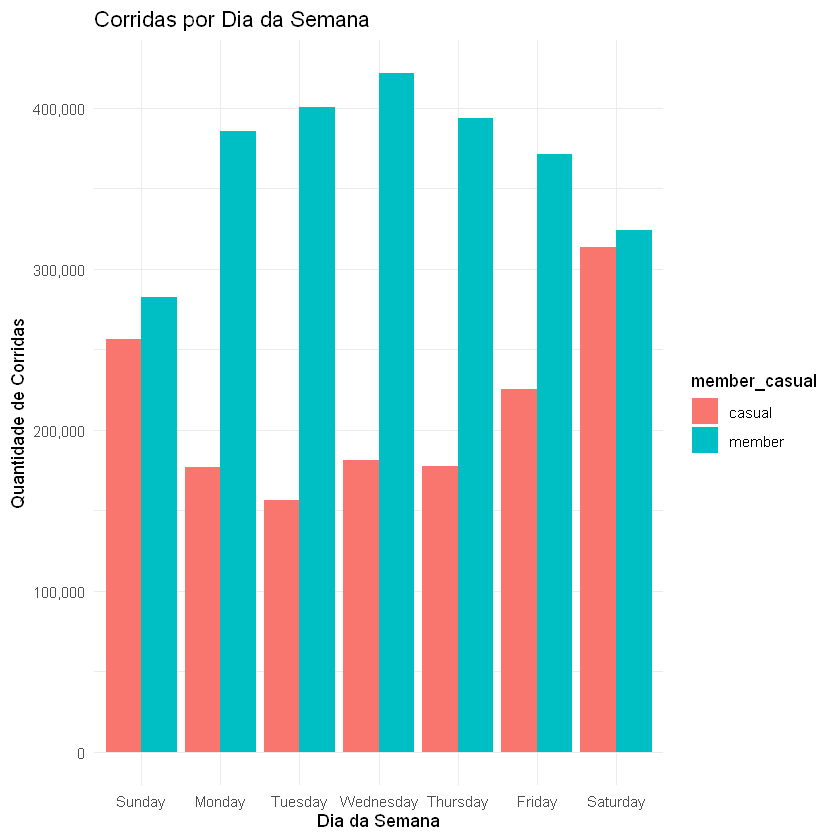

In [ ]:
library(ggplot2)
library(dplyr)

# Converte a coluna `day_of_week` para fator com ordem correta
df$day_of_week <- factor(df$day_of_week,
                         levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# GRÁFICO 1
# Gráfico com dias ordenados e eixo Y formatado
ggplot(df, aes(x = day_of_week, fill = member_casual)) +
  geom_bar(position = "dodge") +
  labs(title = "Corridas por Dia da Semana", x = "Dia da Semana", y = "Quantidade de Corridas") +
  scale_y_continuous(labels = scales::comma) +  # Formata o eixo Y com números inteiros
  theme_minimal()


### Nota-se que Sábado e Domingo são os dias com maior quantidade de corridas para os Casuais.  
### E o oposto acontece para os Membros. Sábados e domingos são os dias de menor frequência para esses usuários.  
Isso nos indica que os membros têm uma maior preferência para os dias da semana, pois devem utilizar para ir ao trabalho ou para alguma atividade relacionada.  
Já os Casuais, por ter uma frequência maior nos finais de semana, possivelmente, são para atividades de lazer.

---
# Analisando a preferência nos tipos de bicicletas

In [ ]:
# Agrupa, conta e calcula a porcentagem
df_bike_percent <- df %>%
  group_by(member_casual, rideable_type) %>%
  summarise(qtd = n(), .groups = "drop") %>%
  group_by(member_casual) %>%
  mutate(percent = round(qtd / sum(qtd) * 100, 2))

# Visualiza a tabela final
print(df_bike_percent)


# A tibble: 6 × 4
# Groups:   member_casual [2]
  member_casual rideable_type        qtd percent
  <chr>         <chr>              <int>   <dbl>
1 casual        classic_bike      934038   62.8 
2 casual        electric_bike     527661   35.5 
3 casual        electric_scooter   25273    1.7 
4 member        classic_bike     1634805   63.4 
5 member        electric_bike     923194   35.8 
6 member        electric_scooter   21673    0.84


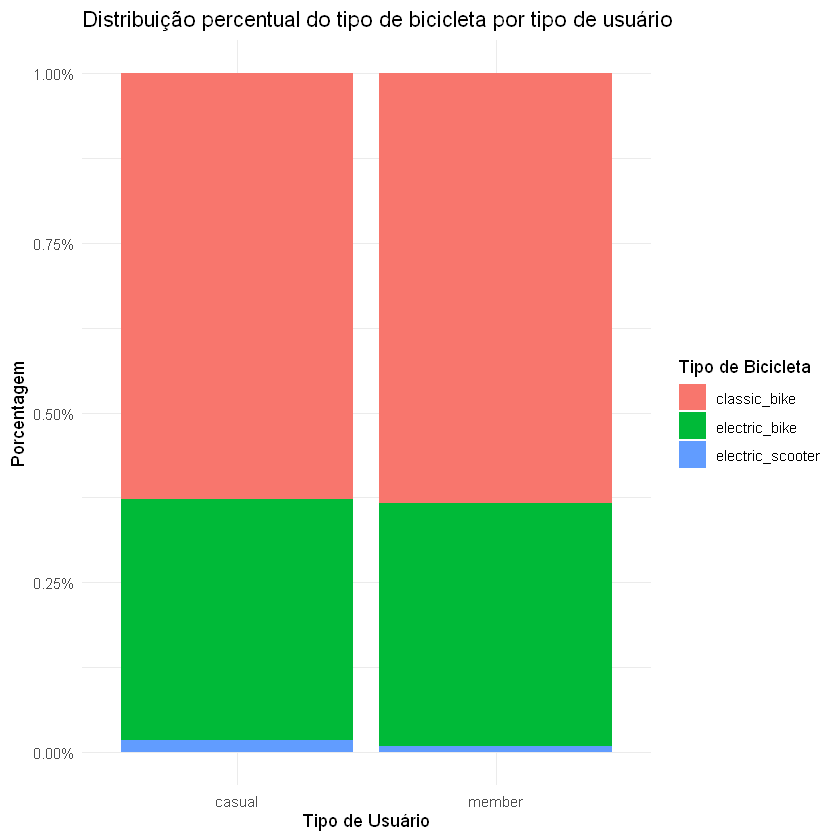

In [ ]:
# GRÁFICO 2
# Gráfico de barras empilhadas com porcentagem
ggplot(df_bike_percent, aes(x = member_casual, y = percent, fill = rideable_type)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  labs(
    title = "Distribuição percentual do tipo de bicicleta por tipo de usuário",
    x = "Tipo de Usuário",
    y = "Porcentagem",
    fill = "Tipo de Bicicleta"
  ) +
  theme_minimal()

Notamos que não há nenhuma relacão entre o tipo de bicicleta preferido para cada tipo de usuário, pois as porcentagens são parecidas para ambos.

---
# Visualizando por mês

In [19]:
install.packages("lubridate")

Instalando pacote em 'C:/Users/JoTa/AppData/Local/R/win-library/4.4'
(como 'lib' não foi especificado)



pacote 'lubridate' desempacotado com sucesso e somas MD5 verificadas


Warning message:
"não foi possível remover a instalação prévia do pacote 'lubridate'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\JoTa\AppData\Local\R\win-library\4.4\00LOCK\lubridate\libs\x64\lubridate.dll to C:\Users\JoTa\AppData\Local\R\win-library\4.4\lubridate\libs\x64\lubridate.dll: Permission denied"
Warning message:
"'lubridate' restaurado"



Os pacotes binários baixados estão em
	C:\Users\JoTa\AppData\Local\Temp\RtmpwJ3GpA\downloaded_packages


In [20]:
library(lubridate)

# OBS: Como são dados dos Estados Unidos, as estacões são invertidas.
df <- df %>%  # Adiciona a coluna de estacão no df.
  mutate(month = month(started_at),
         season = case_when(
           month %in% c(12, 1, 2)  ~ "Winter",
           month %in% c(3, 4, 5)   ~ "Spring",
           month %in% c(6, 7, 8)   ~ "Summer",
           month %in% c(9, 10, 11) ~ "Fall"
         ))


Warning message:
"pacote 'lubridate' foi compilado no R versão 4.4.3"



Anexando pacote: 'lubridate'


Os seguintes objetos são mascarados por 'package:base':

    date, intersect, setdiff, union




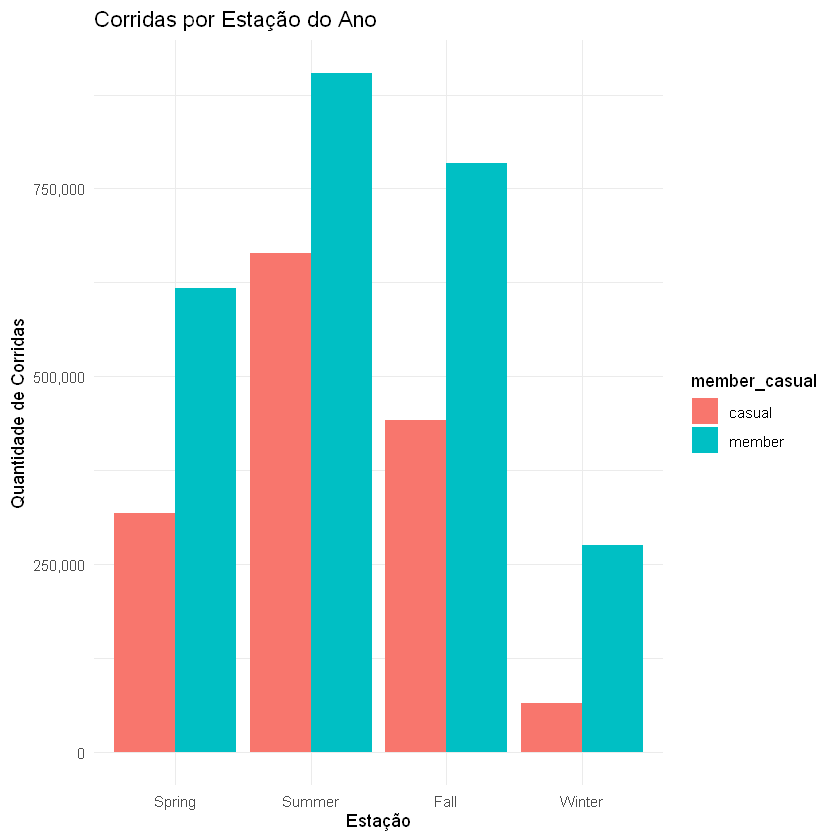

In [ ]:
# GRÁFICO 3
# Ordena as estacões corretamente
df$season <- factor(df$season, levels = c("Spring", "Summer", "Fall", "Winter"))

# Gráfico
ggplot(df, aes(x = season, fill = member_casual)) +
  geom_bar(position = "dodge") +        # Barra lado a lado
  labs(title = "Corridas por Estação do Ano", x = "Estação", y = "Quantidade de Corridas") +
  scale_y_continuous(labels = scales::comma) +      # Formata o eixo Y com números inteiros
  theme_minimal()       # Tema minimalista

---
# Visualizando apenas os dados dos Casuais

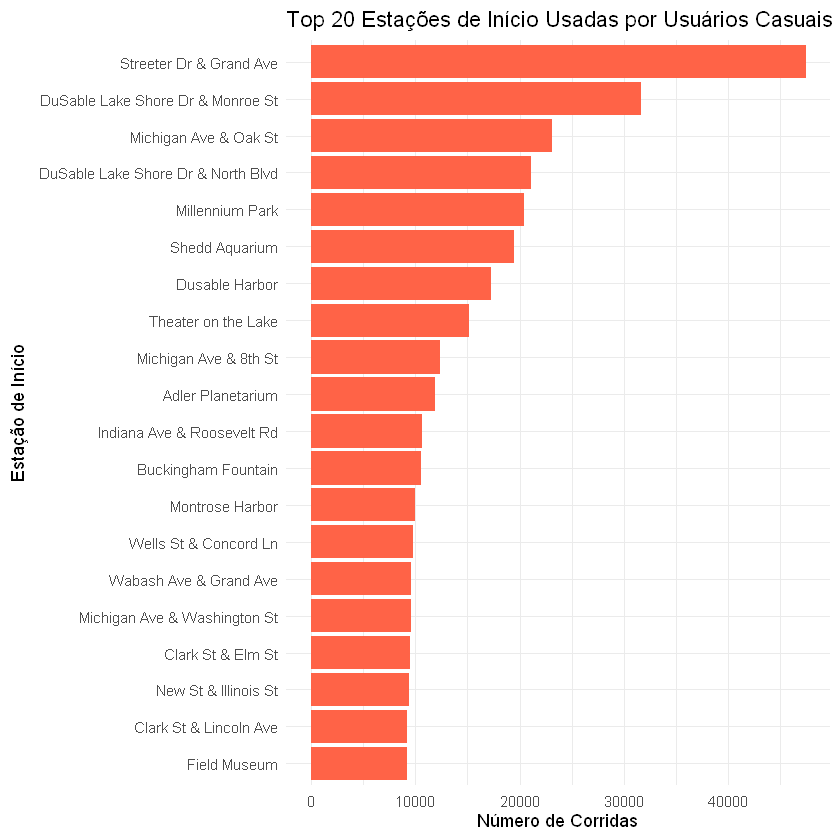

In [ ]:
# GRÁFICO 4
# Gráfico para visualizar os locais de início mais populares para Casuais

df %>%
  filter(member_casual == "casual", !is.na(start_station_name)) %>%
  count(start_station_name, sort = TRUE) %>%
  slice_max(n, n = 20) %>%  # top 20 estações
  ggplot(aes(x = reorder(start_station_name, n), y = n)) +
  geom_col(fill = "tomato") +
  coord_flip() +
  labs(
    title = "Top 20 Estações de Início Usadas por Usuários Casuais",
    x = "Estação de Início",
    y = "Número de Corridas"
  ) +
  theme_minimal()

# Esses são possíveis locais/pontos para fazer campanhas de marketing.

In [ ]:
# Aqui nós preparamos os dados com o tempo dos casuais.

# Substituindo os valores de ride_length para o formato correto.

df_casual <- df %>%
  filter(member_casual == "casual") %>%
  mutate(
    tempo = hms(ride_length),
    ride_length_minutes = hour(tempo) * 60 + minute(tempo) + second(tempo) / 60
  )


Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `tempo = hms(ride_length)`.
Caused by warning in `.parse_hms()`:
! Some strings failed to parse"


Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`)."


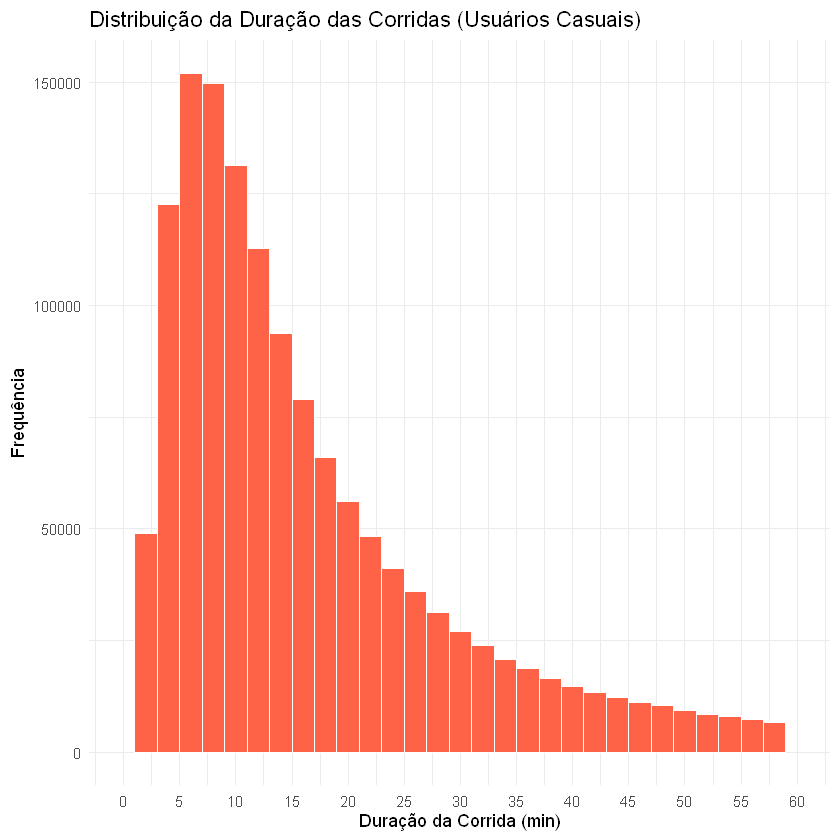

In [ ]:
# GRÁFICO 5
# Histograma para visualizar a duração das corridas para usuários casuais
# Limite de 60 min para melhor visualização

ggplot(df_casual %>% filter(ride_length_minutes < 60), aes(x = ride_length_minutes)) +
  geom_histogram(binwidth = 2, fill = "tomato", color = "white") +
  labs(
    title = "Distribuição da Duração das Corridas (Usuários Casuais)",
    x = "Duração da Corrida (min)",
    y = "Frequência"
  ) +
  scale_x_continuous(limits = c(0, 60), breaks = seq(0, 60, by = 5)) +
  theme_minimal()

# Maior frequência observada: entre 3 e 15 min...
# Ainda assim, há algumas corridas que superam esse tempo.
# Juntando todas, teríamos um público que poderia ser convertido em membros.

In [ ]:
# A partir daqui, preparamos os datos para visualizar os Casuais em cada mês.

# Criar uma nova coluna mes como formato Date
df_casual_mensal <- df %>%
  filter(member_casual == "casual") %>%
  mutate(mes = floor_date(as.Date(started_at), unit = "month"))  # Apenas ano e mês

In [ ]:
# Agrupar por mês e contar corridas
df_casual_mensal_resumo <- df_casual_mensal %>%
  group_by(mes) %>%
  summarise(total_corridas = n())

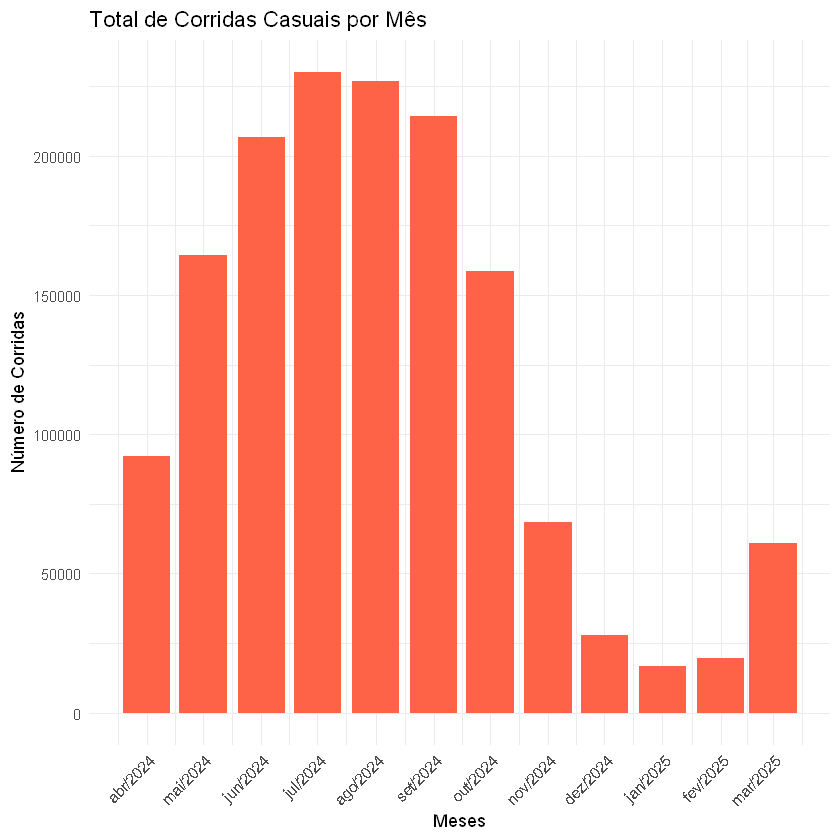

In [ ]:
# GRÁFICO 6
# Gráfico de barras com número total de corridas Casuais por mês.

ggplot(df_casual_mensal_resumo, aes(x = mes, y = total_corridas)) +
  geom_col(fill = "tomato") +
  labs(
    title = "Total de Corridas Casuais por Mês",
    x = "Meses",
    y = "Número de Corridas"
  ) +
  scale_x_date(date_labels = "%b/%Y", date_breaks = "1 month") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Lembrando que esses dados são referentes ao hemisfério norte.
# Logo, os meses de inverno são os meses de dezembro, janeiro e fevereiro.

---
# Criando um Boxplot de comparacão

In [34]:
# Criar um novo dataframe temporário só para o gráfico, com a coluna ride_length_minutes
df_boxplot <- df %>%
  mutate(
    member_casual = tolower(trimws(member_casual)),  # Padroniza os nomes dos grupos
    tempo = hms(ride_length),
    ride_length_minutes = hour(tempo) * 60 + minute(tempo) + second(tempo) / 60
  ) %>%
  filter(ride_length_minutes > 1 & ride_length_minutes < 240)  # Corridas entre 1 min e 4 horas

head(df_boxplot)

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `tempo = hms(ride_length)`.
Caused by warning in `.parse_hms()`:
! Some strings failed to parse"


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,month,season,tempo,ride_length_minutes
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>,<dbl>,<fct>,<Period>,<dbl>
1,322ED1A33EAD23C4,electric_bike,2024-06-23 10:49:43,2024-06-23 11:02:27,Wells St & Elm St,KA1504000135,Southport Ave & Clybourn Ave,TA1309000030,41.90326,-87.63486,41.92077,-87.66371,member,00:12:43.84,Sunday,6,Summer,12M 43.84S,12.73067
2,CB358067A835C900,classic_bike,2024-06-12 16:20:44,2024-06-12 16:28:03,Dearborn St & Monroe St,TA1305000006,State St & Kinzie St,13050,41.88132,-87.62952,41.88937,-87.62708,member,00:07:19.356,Wednesday,6,Summer,7M 19.356S,7.32260
3,9DEB17F6A13B2160,electric_bike,2024-06-20 17:56:00,2024-06-20 18:17:07,Wells St & Elm St,KA1504000135,Racine Ave & Washington Blvd,654,41.90311,-87.63462,41.88307,-87.65695,casual,00:21:06.986,Thursday,6,Summer,21M 6.986S,21.11643
4,8299693EA273A24F,classic_bike,2024-06-08 07:42:34,2024-06-08 08:02:21,Lakefront Trail & Bryn Mawr Ave,15576,Clarendon Ave & Gordon Ter,13379,41.98404,-87.65228,41.95787,-87.64951,casual,00:19:46.614,Saturday,6,Summer,19M 46.614S,19.77690
5,4B8EB5D51DBC50EF,classic_bike,2024-06-13 15:36:43,2024-06-13 16:00:16,Dearborn St & Monroe St,TA1305000006,Southport Ave & Clybourn Ave,TA1309000030,41.88132,-87.62952,41.92077,-87.66371,member,00:23:32.386,Thursday,6,Summer,23M 32.386S,23.53977
6,20D82B8956DCA88B,electric_bike,2024-06-13 14:40:02,2024-06-13 15:08:33,Orleans St & Merchandise Mart Plaza,TA1305000022,State St & Kinzie St,13050,41.88781,-87.63697,41.88937,-87.62708,casual,00:28:31.031,Thursday,6,Summer,28M 31.031S,28.51718


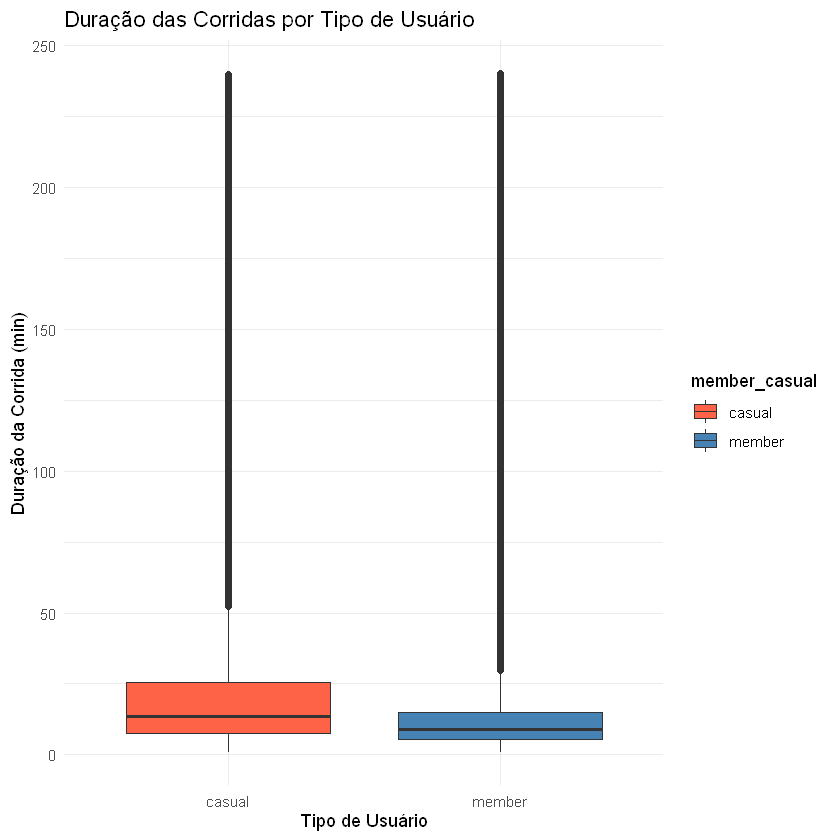

In [ ]:
# GRÁFICO 7
# Criar o boxplot
ggplot(df_boxplot, aes(x = member_casual, y = ride_length_minutes, fill = member_casual)) +
  geom_boxplot() +
  labs(
    title = "Duração das Corridas por Tipo de Usuário",
    x = "Tipo de Usuário",
    y = "Duração da Corrida (min)"
  ) +
  scale_fill_manual(values = c("casual" = "tomato", "member" = "steelblue")) +
  theme_minimal()


O **Boxplot** nos mostra algumas informacões que foram vistas anteriormente.  
- Usuários casuais realizam corridas significativamente mais longas do que membros anuais, com uma maior variação de tempo.  
- Já os membros apresentam comportamentos mais regulares, com corridas geralmente mais curtas.  

Esses dados indicam perfis de uso distintos: casuais tendem a usar para lazer, enquanto membros utilizam mais para locomoção no dia a dia.  

### Analisando as características do Boxplot:  
1. Mediana (linha na caixa):
A mediana dos casuais está acima da mediana dos membros.
Isso mostra que, em média, os usuários casuais fazem corridas mais longas do que os membros.
  
2. Altura da caixa (IQR – intervalo interquartil):
A caixa dos casuais é mais alta: maior variação nas durações entre os 25% e 75% dos dados.
  
**Casual**: comportamento menos previsível e mais diverso nas durações.  
**Member**: comportamento mais constante (as corridas tendem a durar aproximadamente o mesmo tempo).  
  
3. Bigodes (whiskers):  
Ambos os grupos têm bigodes longos chegando a quase 240 min, mostrando que há corridas longas em ambos os casos.  
Como filtramos até 240 min (4h), os valores extremos estão contidos.  
  
O que isso nos diz sobre os usuários?  

**Casuais**:  
- Usam o sistema com menos frequência, mas fazem corridas mais longas.  
- Pode estar associado a uso turístico, lazer ou passeios mais longos.  
  
**Membros**:  
- Usam com mais frequência, mas com corridas mais curtas e consistentes.  
- Possivelmente para deslocamentos diários, como trabalho ou estudo.  

---

# <span style="color:purple">**SHARE – Insights obtidos**</span>
### Voltando para as perguntas dos stakeholders:  
1) **Como os Membros Anuais e os Casuais se diferenciam?**  
2) **Por que um usuário Casual compraria o plano Anual?**  
3) **Como influenciar usuários Casuais a se tornarem Membros pelas Mídias Digitais?**  

---
  
## Respondendo a questão 1:     

1) **Como os Membros Anuais e os Casuais se diferenciam?**  
  
  
### Critério---------------------Membros----------------------------------------Casuais  
**Horário de uso**--------------------------Maior uso em horário comercial (08h–18h)-----------------------------Uso mais espalhado ao longo do dia  
**Dias da semana**--------------------------Segunda a sexta-feira---------------------------------------------------Finais de semana (sábado e domingo)  
**Duração da corrida**----------------------Corridas mais curtas e objetivas----------------------------------------Corridas mais longas e recreativas  
**Frequência de uso**-----------------------Uso recorrente-----------------------------------------------------------Uso esporádico, maior em datas específicas  

OBS: *Tabela criada baseando-se nas informacões obtidas nos gráficos 1,2,3 e 7(boxplot) e nas consultas SQL anteriores aos gráficos.*  
  
---
  
## Respondendo a questão 2:  
  
2) **Por que um usuário Casual compraria o plano Anual?**  
  
  
A maioria das corridas casuais ocorre nos fins de semana, o que sugere que campanhas promocionais voltadas ao lazer (passeios, turismo urbano) teriam apelo.  
OBS: Como não há valores $ e nem identificadores para os usuários na base de dados, algumas ideias ficam mais difíceis de serem implementadas.  
  
### Possíveis motivos para ser Membro:  
**Economia**:  
- Se o usuário casual usa com frequência moderada (mais de 2x na semana), ele poderia economizar com a assinatura anual (Member).  
- Se o usuário utiliza em corridas mais longas, como foi mostrado nos Gráficos 5 e 7, ele poderia economizar sendo 'Member'.  
  
**Praticidade**:  
- Evitaria a necessidade de selecionar uma forma de pagamento e de ter que inserir os dados todas vezes.  
  
**Benefícios adicionais (poderia obter vantagens)**:  
- Prioridade em corridas ou estações exclusivas (estacões mais utilizadas , como as que foram vistas no Gráfico 4)  
- Descontos em eventos parceiros  
- Recompensas por uso recorrente (cashback ou algum sistema de pontuacão)  

**Estímulo por comportamento**:  
- "Você utilizou o Cyclistic por X minutos. Você teria economizado $Y com nosso plano anual."
   
---
## Respondendo a questão 3:  
  
3) **Como influenciar os usuários casuais a se tornarem membros com Mídias Digitais?**  
  
  
**Criar campanhas e Estratégias baseadas em dados**:  
- "Você usou X vezes este mês — que tal economizar com o plano anual?"  
- Anúncios personalizados com base nos locais mais usados pelo usuário casual (gráfico 4).  
  
**Conteúdo segmentado**:  
  
- Para quem usa de forma recreativa: "Explore mais com acesso ilimitado."  
- Para quem usa nos dias úteis: "Transforme sua ida ao trabalho em algo mais prático e econômico."  
  
**Provas sociais e dados**:  
  
- Mostrar que mais de "60% dos usuários economizam com o plano anual".  
- Usar histórias de usuários reais nas redes.  
---

# <span style="color:red">**ACT – Conclusão e Recomendacões**</span>

*Lembrando, é preciso produzir uma apresentacão com os itens a seguir:*  
Uma declaração clara da tarefa de negócios (OBJETIVO)  
Uma descrição de todas as fontes de dados utilizadas (DADOS)  
Documentação da limpeza e da manipulação dos dados (CLEAN)  
Um resumo da sua análise (RESUMO)  
Visualizações de apoio e principais descobertas (VIZ)  
Suas três principais recomendações com base na análise (ACT)  

## Conclusão:  
Usuários casuais e membros têm perfis e necessidades distintas.  
Compreender essas diferenças permite ações mais inteligentes e personalizadas.  
A Cyclistic pode converter muitos casuais em assinantes fiéis com a estratégia certa.  

## Recomendacões Finais:  
- Campanhas segmentadas para usuários casuais com perfil recreativo, especialmente nos finais de semana e feriados, usando redes sociais com geolocalização.  
- Oferecer período de teste gratuito ou promocional, para que os usuários experimentem os benefícios do plano anual de forma prática.  
- Destacar economia e conveniência do plano anual, usando dados personalizados (tempo de uso, frequência, locais mais visitados) para mostrar o quanto o usuário poderia economizar ao virar membro.  
  
### Apresentacão realizada através do arquivo em PowerPoint.
---